# 2.3 Image enhancement

Image enhancement is the process of adjusting digital images so that the results are more suitable for display or further image analysis.

A tool for image enhancement has already been implemented, this is **linear look-up tables** in 2.1 notebook. In this lesson we will experiment with:

- Non-linear look-up tables
- Histogram equalization

Also, some color-space conversions are going to be needed. If you are not familiar with YCrCb color space, **appendix 2** contain some information about it.

## Problem context - Some Photoshop techniques

<img src="./images/ps.png" width="200">

Adobe Photoshop is software that is extensively used for raster image editing, graphic design and digital art. It makes use of layering to allow for depth and flexibility in the design and editing process, as well as provide powerful editing tools, that when combined, are capable of just about anything. 

**It is also an extreme powerful tool for image processing**. There are thousands of image processing methods implemented that people use all the time. From simple tools for cropping images to complex tools for blurring or refining edges.

Today, we are going to develop and test two methods that are implemented in Adobe Photoshop: [**gamma**](https://www.techwalla.com/articles/how-to-adjust-gamma-in-photoshop) and [**equalize**](https://www.dpreview.com/forums/thread/2160198).

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

images_path = './images/'

### Non-linear look-up tables

**Gamma** or **gamma correction** 

> Gamma correction, or often simply gamma, is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. 

<img src="./images/gamma_theory.jpg" width="800" >

In short, what we should know about [**gamma**](https://www.techwalla.com/articles/how-to-adjust-gamma-in-photoshop) is this it is the application of a (already defined) **non-linear LUT** in order to stretch or shrink image intensities.

$\hspace{2cm}$ Gamma LUT definition for grayscale images $i \in $ [0-255]:

$$lut(i) = (\frac{i}{255})^{\gamma} * 255, \ \gamma \gt 0 $$

**What to do?** Your task is to develop **lut_chart**, that is going to be used for testing reasons. 

This method takes a image and a gamma value as input, it will display a chart containing original image, gamma-corrected image, used LUT and image histogram (after gamma correction).

As photoshop users will use color images, you will have to **implement it for color images**. This can be done transforming **BGR image to YCrCb image**. Then, applying gamma LUT **only** to first band of YCrCb image (because it contains pixel intensities and you can handle it like a gray image). Then, as matplotlib display RGB images it should be **reconverted back**.

In [12]:
def lut_chart(image, gamma):
    """ Applies gamma correction to an image and shows the result.   
    
        Args:
            image: Input image
            gamma: Gamma parameter
    """
    
    #Transform image to YCrCb color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    out_image = np.copy(image)
    
    # Define gamma correction LUT
    lut = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    
    # Apply LUT to first band of the YCrCb image
    out_image[:,:,0] = cv2.LUT(image[:,:,0],lut)
    
    plt.figure(1)
    
    # Plot used LUT
    plt.subplot(2,2,3)
    plt.title('LUT')
    plt.plot(np.arange(256),lut)

    # Plot histogram of gray image
    plt.subplot(2,2,4)
    plt.hist(out_image[:,:,0].ravel(),256,[0,256])
    plt.title('Histogram')
    
    # Reconvert image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
    out_image = cv2.cvtColor(out_image, cv2.COLOR_YCrCb2RGB)
    
    # Show the initial image
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.title('Original image')
    
    # Show the resultant one
    plt.subplot(2,2,2)
    plt.imshow(out_image)
    plt.title('LUT applied')
    
    plt.show()

**You are asked to** try **lut_chart** with `gamma_1.jpg` (underexposed image) and `gamma_2.jpeg` (overexposed image).  
Then, **answer the following question**:

- What is happening when gamma value is modified?

In [13]:
# Create widget object
gamma_widget = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.2, description='Gamma:')

#Read image
image = cv2.imread(images_path + 'gamma_2.jpeg',-1)

#Interact with your code!
interact(lut_chart, image=fixed(image), gamma=gamma_widget)

interactive(children=(FloatSlider(value=1.0, description='Gamma:', max=5.0, min=0.1, step=0.2), Output()), _do…

<function __main__.lut_chart(image, gamma)>

### Histogram equalization

> Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

<img src="./images/equalization.png" width="300" />$\\[5pt]$

So what [**equalize**](https://www.dpreview.com/forums/thread/2160198) method does is histogram equalization. But.. how is this equalization achieved?

- First we have to calculate the PMF ([probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function)) of all the pixels in this image. Basically, this is a normalization of the histogram.

- Next step involves calculation of CDF ([cumulative distributive function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)). Getting the LUT for histogram equalization.

- Finally, apply obtained LUT. $\\[10pt]$

<img src="./images/equalize_theory.png" width="600" />$\\[5pt]$

Similar to previous exercise, **you are asked to** develop **equalize_chart**. 
This method takes a **color** image, it will display a chart containing original image, equalized image, original image histogram and equalized image histogram.

*Tip: openCV implements histogram equalization in [cv2.equalizeHist](https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html?highlight=equalizehist)*



In [14]:
def equalize_chart(image):
    """ Applies histogram equalization to an image and shows the result.   
    
        Args:
            image: Input image
    """    

    #Transform image to YCrCb color space
    image = cv2.cvtColor(image, cv2.cv2.COLOR_BGR2YCrCb)
    out_image = np.copy(image)
    
    # Apply histogram equalization to first band of the YCrCb image
    out_image[:,:,0] = cv2.equalizeHist(image[:,:,0])
   
    plt.figure(1)     
    
    # Plot histogram of gray image 
    plt.subplot(2,2,3)
    plt.hist(image[:,:,0].ravel(),256,[0,256])
    plt.title('Original histogram')

    # Plot equalized histogram
    plt.subplot(2,2,4)
    plt.hist(out_image[:,:,0].ravel(),256,[0,256])
    plt.title('Equalized histogram')
    
    # Reconvert image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_YCrCb2RGB)
    out_image = cv2.cvtColor(out_image, cv2.COLOR_YCrCb2RGB)

    # Show the initial image
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.title('Original image')
    
    # Show the resultant one
    plt.subplot(2,2,2)
    plt.imshow(out_image)
    plt.title('Equalized histogram image')
    
    plt.show()

**You are asked to** try  **equalize_chart** with `park.png`  
Then, **answer following questions**:
- What is the difference between original histogram and equalized?
- Is final histogram uniform?

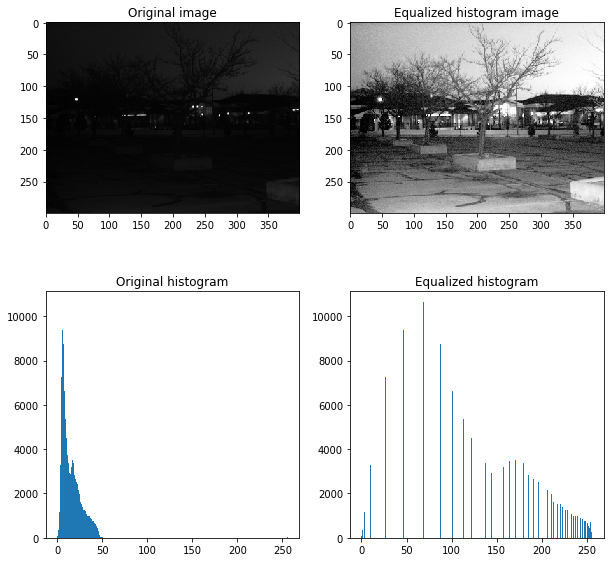

In [15]:
image = cv2.imread(images_path + 'park.png',-1)

equalize_chart(image)

## Conclusion

Great! We hope that next time you use photoshop you have another point of view of how things works.

In conclusion, in this notebook you have learn:

- How to define gamma correction LUT and to appy it to an image.
- How histogram equalization works and its applications.

**Extra**

But this doesn't have to be the end, open Photoshop and look through others implemented methods.  

As you are learning a lot about image proccessing, **comment how you think they are implemented from scratch.**